#### FIRST PROJECT
- Student: Emilia Maul 
- Variant: 1 
- Taking course since: 2022-11-21

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
%matplotlib inline

## 1. Чтение файлов и разведочный анализ

#### Данные о покупателях

In [3]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Просмотр типов данных для принятия решения о их сохранении и проверка наличия пустых значений
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


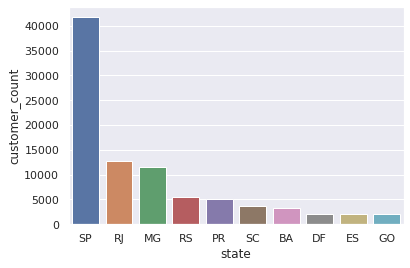

In [5]:
# Просмотр топ 10 стран по количеству покупателей
top_states = customers.customer_state.value_counts().to_frame() \
                      .reset_index().head(10) \
                      .rename(columns={'index':'state', 'customer_state':'customer_count'})
sns.barplot(data=top_states, x='state', y='customer_count')

#### Данные о составах заказов

In [6]:
order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Просмотр типов данных для принятия решения о преобразовании типов
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [8]:
# Смена типа данных для колонки shipping_limit_date
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date, dayfirst=True)

In [9]:
# Проверка наличия пустых значений
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Данные о заказах

In [10]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
# Просмотр типов данных для принятия решения о преобразовании типов
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [12]:
# Создание списка столбцов, тип данных которых необходимо перевести в дату
columns_to_date = orders.columns[-5:].to_list()
columns_to_date

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [13]:
# Преобразование типа данных в дату
for i in columns_to_date:
    orders[i] = pd.to_datetime(orders[i], dayfirst=True)

In [14]:
# Проверка наличия пустых значений
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

    Недостаточно считать заказы со статусом created - покупкой, тк следующим этапом совершения покупки является подтверждение заказа. Поэтому, будем считать покупкой заказы со статусом approved.

In [16]:
approved_orders = orders.query("order_approved_at != ''")
print(approved_orders.shape[0], 'подтвержденных заказов')

99281 подтвержденных заказов


In [17]:
# Объединение данных о покупателях с данными о заказах для нахождения количества заказов на 1 уникального покупателя
customer_orders = customers.merge(orders, on="customer_id")

In [83]:
# Группировка по количеству уникальных покупателей и подсчёт количества совершенных покупок
one_order_customers = customer_orders.groupby('customer_unique_id', as_index=False).agg({'order_id':'count'}) \
                                     .groupby('order_id', as_index=False).agg({'customer_unique_id':'count'}) \
                                     .rename(columns={'order_id':'orders_number', 'customer_unique_id':'customers_count'}) \
                                     .query('orders_number == 1')

print(one_order_customers.customers_count[0], 'покупателей совершили покупку только один раз')

93099 покупателей совершили покупку только один раз


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [89]:
# Проверка наличия заказов со статусом delivered, но с отсутствующим значение в столбце с датой.
customer_orders.query('order_status == "delivered"').isna().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

    Можно ли считать заказ доставленным, если не указана дата доставки (order_delivered_customer_date - отсутствует 8 значений) зависит от того, как с технической стороны проставляется статус "Доставлен". Скорее вссего, это подтверждается покупателем, значит будем считать эти заказы доставленными. Возможно, произошел сбой в записи даты и времени смены статуса заказа.

In [91]:
customer_orders.query('order_status == "delivered" & order_delivered_customer_date == ""')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9034,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
12030,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19
13357,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
51668,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
85377,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
87172,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
89194,4f1d63d35fb7c8999853b2699f5c7649,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP,0d3268bad9b086af767785e3f0fc0133,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
97677,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


    Технически все заказы, у которых нет статуса delivered - не доставлены. Однако, нам интересны те заказы, которые не доставлены по причине какой-то проблемы, а не те, которые просто в процессе обработки или доставки. Поэтому необходимо отобрать заказы, которые можно считать проблемными: canceled и unavailable. 

In [114]:
# Просмотр заказов, у которых отсутствует статус delivered
not_delivered_orders = customer_orders.query('order_status != "delivered"')
not_delivered_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11


In [111]:
# Подсчёт количества недоставленных заказов с разным статусом за каждый месяц
undelivered_orders_by_months = not_delivered_orders \
                                        .groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
                                        .agg({'order_id':'count'}) \
                                        .pivot(index='order_purchase_timestamp', columns='order_status', values='order_id') \
                                        .resample('M', 'index').sum()
undelivered_orders_by_months.head()

order_status,approved,canceled,created,invoiced,processing,shipped,unavailable
order_purchase_timestamp,,,,,,,
2016-09-30,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2016-10-31,0.0,24.0,0.0,18.0,2.0,8.0,7.0
2016-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-31,0.0,3.0,0.0,12.0,9.0,16.0,10.0


In [112]:
# Отбор заказов со статусами canceled и unavailable и подсчёт среднего значения недоставленных заказов в месяц 
mean_undel_orders_by_month = undelivered_orders_by_months[['canceled', 'unavailable']].mean()

In [113]:
mean_cancelled = int(mean_undel_orders_by_month[0].round())
mean_unavailable = int(mean_undel_orders_by_month[1].round())

print('В среднем {} заказа в месяц не доставляется по причине canceled и {} заказа - по причине unavailable' \
      .format(mean_cancelled, mean_unavailable))

В среднем 24 заказа в месяц не доставляется по причине canceled и 23 заказа - по причине unavailable
